In [1]:
#!pip install pydotplus

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


# Loading and preprocessing data

In [3]:
features = pd.read_csv('../data/features_data_cleaned.csv')

In [4]:
features.head()

,name,price,neighbourhood_cleansed,room_type,minimum_nights,accommodates,bedrooms,beds,bathroom_count,bathroom_type
0,Nashville Charm,40.0,District 6,Private room,30,2,2.0,3.0,1.0,private bath
1,Large Main Suite near Lake *ladies only NS plz,45.0,District 12,Private room,30,1,1.0,1.0,1.0,private bath
2,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,90.0,District 18,Entire home/apt,2,4,2.0,2.0,1.0,bath
3,"SuperSweetSTUDIO, jacuzzi, open Nov 23, 6 mo",39.0,District 12,Private room,30,3,1.0,5.0,1.0,private bath
4,"MorningstarHouse, monthly room- open Aug 19",33.0,District 12,Private room,30,1,1.0,3.0,1.0,shared bath


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8126 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    8126 non-null   object 
 1   price                   8126 non-null   float64
 2   neighbourhood_cleansed  8126 non-null   object 
 3   room_type               8126 non-null   object 
 4   minimum_nights          8126 non-null   int64  
 5   accommodates            8126 non-null   int64  
 6   bedrooms                8126 non-null   float64
 7   beds                    8126 non-null   float64
 8   bathroom_count          8126 non-null   float64
 9   bathroom_type           8124 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 635.0+ KB


In [6]:
features[features['bathroom_type'].isnull()]

# add 
features.loc[features['bathroom_type'].isnull(), 'bathroom_type'] = 'NA'

In [7]:
features[features['bathroom_type'].isnull()]

,name,price,neighbourhood_cleansed,room_type,minimum_nights,accommodates,bedrooms,beds,bathroom_count,bathroom_type


In [8]:
# divide the variables into X and y 

X= features[['neighbourhood_cleansed','room_type', 'minimum_nights','accommodates',
             'bedrooms','beds','bathroom_count', 'bathroom_type']]


In [9]:
# One-hot encode all features in X.
X = pd.get_dummies(X)
X.head()

,minimum_nights,accommodates,bedrooms,beds,bathroom_count,neighbourhood_cleansed_District 1,neighbourhood_cleansed_District 10,neighbourhood_cleansed_District 11,neighbourhood_cleansed_District 12,neighbourhood_cleansed_District 13,...,neighbourhood_cleansed_District 8,neighbourhood_cleansed_District 9,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_NA,bathroom_type_bath,bathroom_type_private bath,bathroom_type_shared bath
0,30,2,2.0,3.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,30,1,1.0,1.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,2,4,2.0,2.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,30,3,1.0,5.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,30,1,1.0,3.0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [10]:
y= features.price

In [11]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 246)

# Modelling

Modelling with no hyper parameter tuning

In [12]:
# Create the model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 216727.54625699762


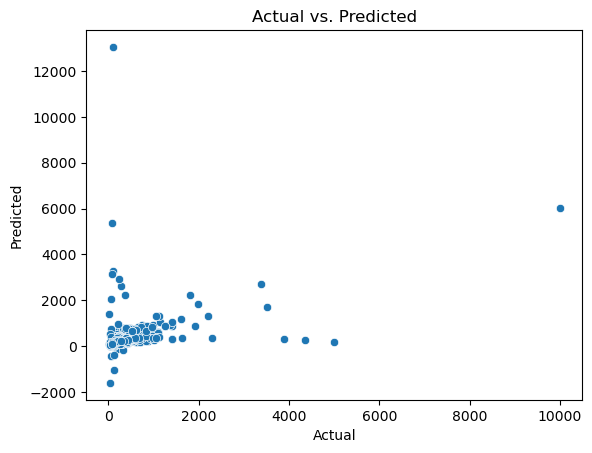

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot using seaborn
sns.scatterplot(x=y_test, y=y_pred)

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Show the plot
plt.show()

Modelling with hyper parameters

In [14]:
regressor = GradientBoostingRegressor()

# randomized hyperparameters
param_grid = {
    'n_estimators': np.random.randint(100, 1000, size=10),
    'learning_rate': np.random.uniform(0.01, 0.1, size=10),
    'max_depth': np.random.randint(3, 10, size=10),
    'max_features': np.random.uniform(0.1, 1.0, size=10),
    'subsample': np.random.uniform(0.5, 1.0, size=10)
}

# grid search
grid = RandomizedSearchCV(regressor, param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = grid.best_estimator_
best_params = grid.best_params_

# Use the best model for prediction
y_pred = best_model.predict(X_test)

In [15]:
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameter: ", grid.best_params_)
print("Best Accuracy Score: ", grid.best_score_)

# Evaluate the best model on the validation set
val_predictions = best_model.predict(X_test)
accuracy = (val_predictions == y_test).sum() / len(y_test)
print("Validation Accuracy: ", accuracy)

Best Hyperparameter:  {'subsample': 0.8312111874293541, 'n_estimators': 796, 'max_features': 0.9534336764744177, 'max_depth': 5, 'learning_rate': 0.05109069010858615}
Best Accuracy Score:  -1140098.625759776
Validation Accuracy:  0.0


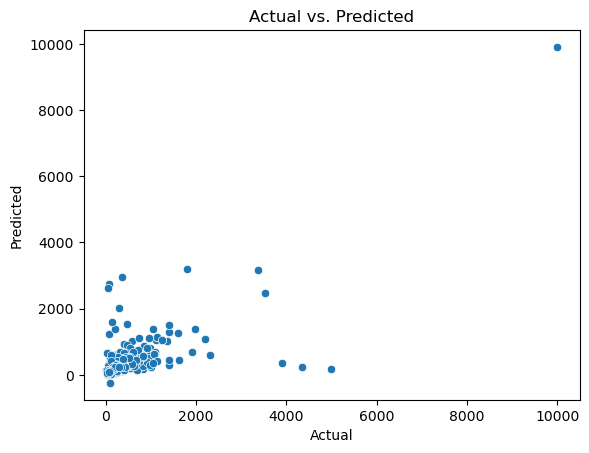

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot using seaborn
sns.scatterplot(x=y_test, y=y_pred)

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Show the plot
plt.show()

In [22]:
#remove the ten thousand to get a better view.

# Find the index of the largest number
index_of_pred_max = np.argmax(y_pred)

# Remove the largest number from the array
y_pred_zoom = np.delete(y_pred, index_of_pred_max)


# Find the largest value in the Series
max_value = y_test.max()

# Create a new Series without the largest value
y_test_zoom = y_test[y_test != max_value]

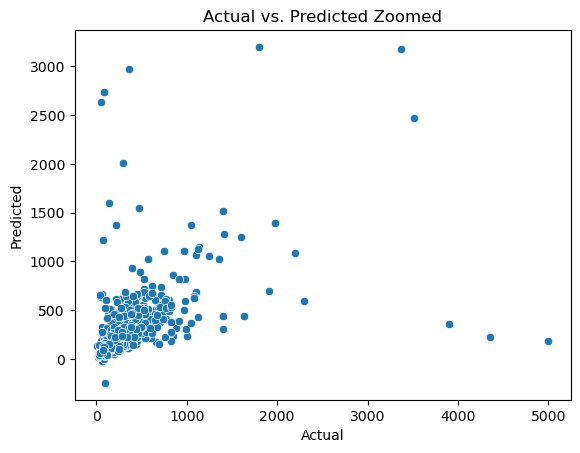

In [23]:
# Create a scatterplot using seaborn
sns.scatterplot(x=y_test_zoom, y=y_pred_zoom)

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Zoomed')

# Show the plot
plt.show()

minimum_nights: 0.3897211004194424
accommodates: 0.28269580629451185
beds: 0.21163261806127068
bathroom_count: 0.03290827916583827
neighbourhood_cleansed_District 19: 0.014692747374658439
bedrooms: 0.012283961022934737
neighbourhood_cleansed_District 13: 0.011449907308066883
neighbourhood_cleansed_District 20: 0.010357969812104552
neighbourhood_cleansed_District 6: 0.007737677174838504
room_type_Entire home/apt: 0.006807434419796955
bathroom_type_bath: 0.005263848294267082
room_type_Hotel room: 0.004513460114607086
room_type_Private room: 0.003049784933604387
neighbourhood_cleansed_District 34: 0.0015585453388731177
neighbourhood_cleansed_District 21: 0.0011180832116900778
neighbourhood_cleansed_District 11: 0.0008308189709505259
neighbourhood_cleansed_District 5: 0.0006191165103142524
neighbourhood_cleansed_District 15: 0.0005035873147372834
neighbourhood_cleansed_District 17: 0.0004698679447057246
neighbourhood_cleansed_District 18: 0.0003801328926686811
neighbourhood_cleansed_Distri

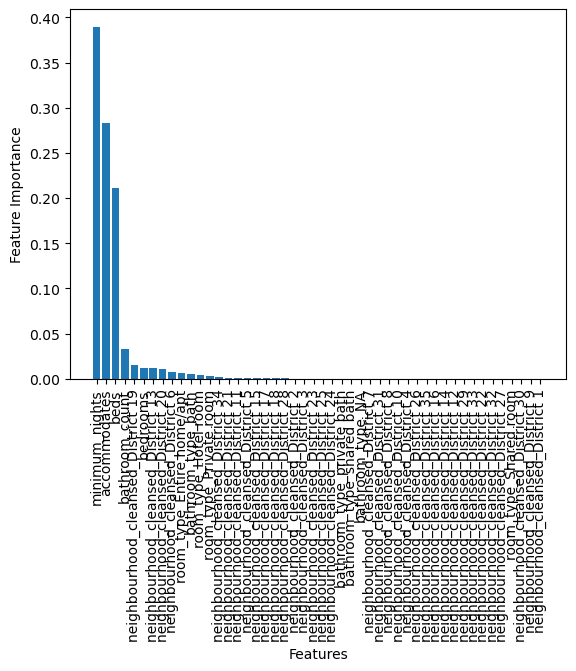

In [24]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

# Print and visualize feature importances
for i in sorted_idx:
    print(f"{X.columns[i]}: {feature_importances[i]}")

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), X.columns[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.show()